<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0017_RL__Optimistic_Initial_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In stationary problems, optimistic initial values quite effectively encourage action-value methods to explore.

Here we compare the performance of a greedy method using $Q_1(a) = +5$ for all actions $a$ with an $\epsilon-$greedy method with $Q_1(a) = 0$ for all $a$, on the $10-$armed bandit testbed.

# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(22)

# Reward Function

In [3]:
def reward(action : int) :
  R = np.random.normal(loc=true_value[action], scale=1)
  return R

# Total Runs and Steps per run

In [4]:
total_runs = 2000; steps = 1000

# Greedy Action Selection

In [5]:
def greedy_run(steps : int) :

  greedy_history = np.empty((steps, 4))

  Q = np.zeros(10) + 5 # optimistic initial values
  N = np.zeros(10)

  alpha = 0.1 # constant step-size

  optimal_action = np.argmax(true_value)

  for step in range(1, steps+1) :
    action = np.random.choice(np.flatnonzero(Q == Q.max()))
    N[action] += 1
    R = reward(action)

    Q[action] += alpha * (R - Q[action])

    greedy_history[step-1, :] = [step, action, R, int(action == optimal_action)]

  return greedy_history

In [6]:
greedy_history_all_runs = np.empty((total_runs, steps, 4))

In [7]:
for run in range(total_runs) :
  true_value = np.random.normal(loc=0, scale=1, size=10)
  greedy_history_all_runs[run, :, :] = greedy_run(steps=steps)

# $\epsilon-$greedy Action Selection

In [8]:
def epsilon_greedy_run(steps : int, epsilon : float) :

  epsilon_greedy_history = np.empty((steps, 4))

  Q = np.zeros(10)
  N = np.zeros(10)

  alpha = 0.1 # step-size

  optimal_action = np.argmax(true_value)

  for step in range(1, steps+1) :
    u = np.random.rand()

    if u <= epsilon :
      action = np.random.choice(range(10))
    else :
      action = np.random.choice(np.flatnonzero(Q == Q.max()))

    N[action] += 1
    R = reward(action)

    Q[action] += alpha * (R - Q[action])

    epsilon_greedy_history[step-1, :] = [step, action, R, int(action == optimal_action)]

  return epsilon_greedy_history

## $\epsilon = 0.1$

In [9]:
epsilon_greedy_history_all_runs = np.empty((total_runs, steps, 4))

In [10]:
for run in range(total_runs) :
  true_value = np.random.normal(loc=0, scale=1, size=10)
  epsilon_greedy_history_all_runs[run, :, :] = epsilon_greedy_run(steps=steps, epsilon=0.1)

# Comparison by Percentage Optimal Action

In [11]:
percentage_optimal_action = pd.DataFrame(columns=["Optimistic, greedy", "Realistic, ep=0.1"])

In [12]:
percentage_optimal_action["Optimistic, greedy"] = np.mean(greedy_history_all_runs[:, :, 3], axis=0) * 100
percentage_optimal_action["Realistic, ep=0.1"] = np.mean(epsilon_greedy_history_all_runs[:, :, 3], axis=0) * 100

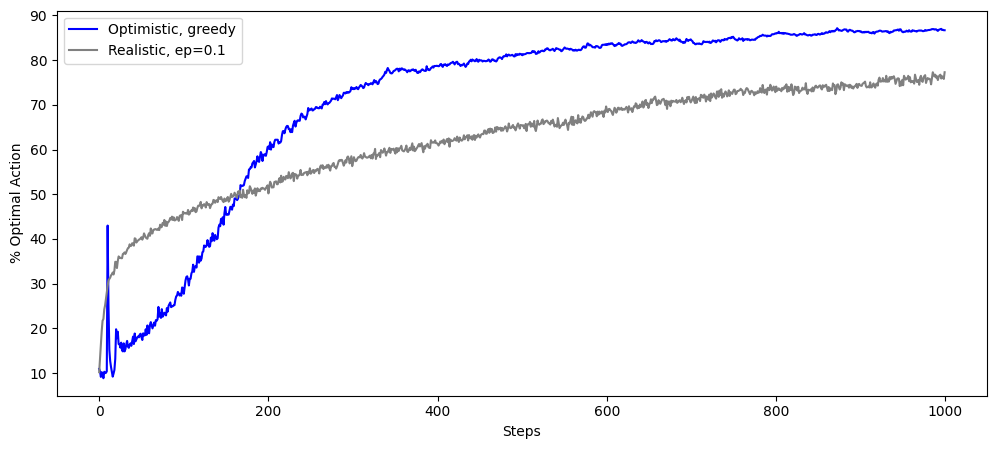

In [13]:
percentage_optimal_action.plot(color=["blue", "gray"], figsize=(12, 5))
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")

plt.show()

**Initially, the optimistic method performs worse because it explores more, but eventually it performs better because its exploration decreases with time.**